In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
df = pd.read_csv("new DS.csv")

In [4]:
df.shape

(187, 10)

In [12]:
df

,Pka,Molecular Weight,Drug Affinity,Solubility,Name,Side Effects,Use,Mechanism of Action,Dosage,Contraindications
0,8.5,300.5,High,50 mg/mL,Aspirin,Headache,Pain relief,Inhibition of prostaglandin synthesis,500 mg every 4-6 hours,Bleeding disorders
1,7.0,450.2,Moderate,30 mg/mL,Ibuprofen,Nausea,Inflammation reduction,COX enzyme inhibition,200-400 mg every 4-6 hours,Peptic ulcers
2,9.2,600.8,Low,20 mg/mL,Diphenhydramine,Drowsiness,Allergy relief,Histamine receptor blockade,25-50 mg every 4-6 hours,Glaucoma
3,6.8,700.3,High,40 mg/mL,Metformin,Diarrhea,Type 2 diabetes management,AMPK activation,500-2000 mg daily,Kidney dysfunction
4,5.5,550.6,Very High,25 mg/mL,Warfarin,Bleeding,Anticoagulation,Vitamin K antagonist,Variable,Active bleeding
...,...,...,...,...,...,...,...,...,...,...
182,8.9,440.5,Very Low,38 mg/mL,Nitroprusside,Cyanide toxicity,Hypertensive emergencies,Nitric oxide release,Variable (intravenous),Renal impairment
183,6.8,580.2,High,30 mg/mL,Fosphenytoin,Phlebitis,Seizure disorder treatment,Prodrug of phenytoin,Variable (intravenous),Sinus bradycardia
184,9.5,400.7,Low,36 mg/mL,Pioglitazone,Edema,Type 2 diabetes management,PPAR-gamma receptor activation,15-45 mg daily,Heart failure
185,7.6,470.4,Very High,18 mg/mL,Ramipril,Persistent cough,Hypertension and heart failure treatment,ACE inhibition,2.5-20 mg daily,Pregnancy


In [ ]:
df.info

<bound method DataFrame.info of      Pka   Molecular Weight  Drug Affinity  Solubility  \
0    8.5              300.5           High    50 mg/mL   
1    7.0              450.2       Moderate    30 mg/mL   
2    9.2              600.8            Low    20 mg/mL   
3    6.8              700.3           High    40 mg/mL   
4    5.5              550.6      Very High    25 mg/mL   
..   ...                ...            ...         ...   
182  8.9              440.5       Very Low    38 mg/mL   
183  6.8              580.2           High    30 mg/mL   
184  9.5              400.7            Low    36 mg/mL   
185  7.6              470.4      Very High    18 mg/mL   
186  8.2              400.9            Low    34 mg/mL   

                       Name       Side Effects  \
0                   Aspirin           Headache   
1                 Ibuprofen             Nausea   
2           Diphenhydramine         Drowsiness   
3                 Metformin           Diarrhea   
4                  Wa

In [ ]:
df['Pka']


0      8.5
1      7.0
2      9.2
3      6.8
4      5.5
      ... 
182    8.9
183    6.8
184    9.5
185    7.6
186    8.2
Name: Pka, Length: 187, dtype: float64

Text(0.5, 1.0, 'Drug Distribution number')

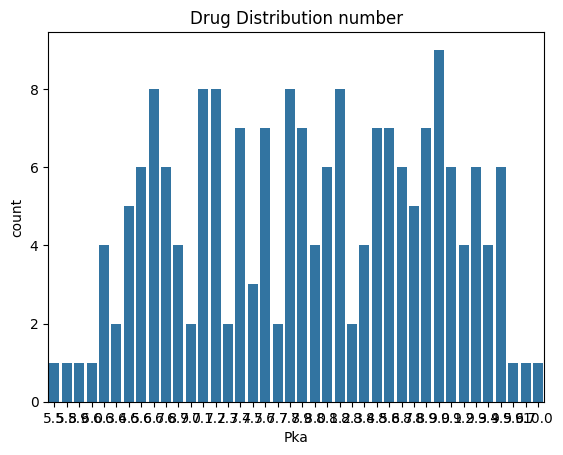

In [ ]:
sns.countplot(x=df['Pka'])
plt.title('Drug Distribution number')

<ipython-input-8-82cffdb2cf7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' Molecular Weight'])


<Axes: xlabel=' Molecular Weight', ylabel='Density'>

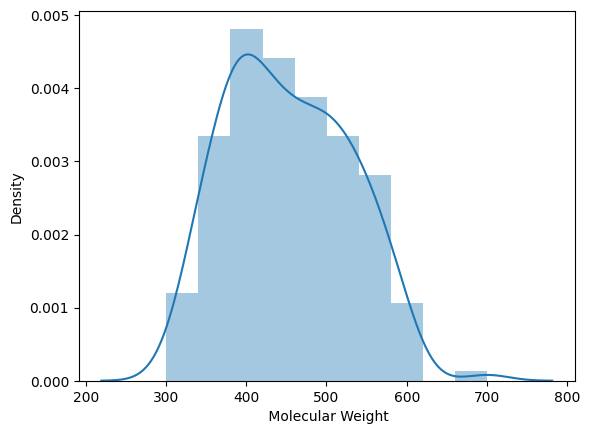

In [8]:
sns.distplot(df[' Molecular Weight'])

<ipython-input-14-5380e7714dab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' Solubility'])


<Axes: xlabel=' Solubility', ylabel='Density'>

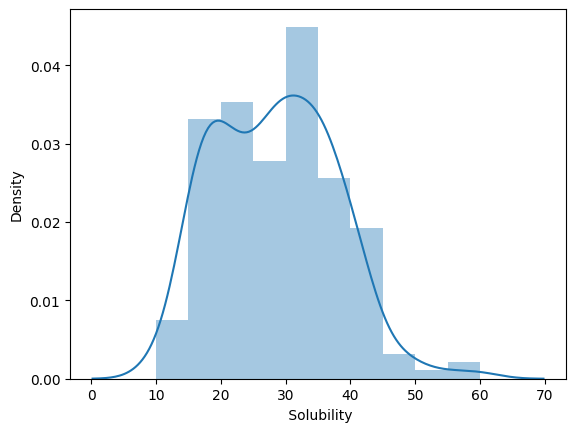

In [14]:
sns.distplot(df[' Solubility'])

In [15]:
df[" Drug Affinity"].value_counts()

 Low          51
 High         49
 Very High    37
 Moderate     36
 Very Low     14
Name:  Drug Affinity, dtype: int64

In [16]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [17]:
from sklearn.metrics import  classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'column_name' is the string column
label_encoder = LabelEncoder()
df['Pka'] = label_encoder.fit_transform(df['Pka'])
df[' Drug Affinity'] = label_encoder.fit_transform(df[' Drug Affinity'])
df[' Molecular Weight'] = label_encoder.fit_transform(df[' Molecular Weight'])
df[' Solubility'] = label_encoder.fit_transform(df[' Solubility'])

In [21]:
X = df.drop([' Name' ,' Side Effects',' Use',' Mechanism of Action',' Dosage',' Contraindications'], axis='columns')
y = df[' Name']

In [22]:
y

0                     Aspirin
1                   Ibuprofen
2             Diphenhydramine
3                   Metformin
4                    Warfarin
                ...          
182             Nitroprusside
183              Fosphenytoin
184              Pioglitazone
185                  Ramipril
186     Tiotropium/Olodaterol
Name:  Name, Length: 187, dtype: object

In [23]:
X

,Pka,Molecular Weight,Drug Affinity,Solubility
0,26,0,0,23
1,11,61,2,12
2,33,124,1,6
3,9,126,0,18
4,0,110,3,9
...,...,...,...,...
182,30,57,4,17
183,9,117,0,12
184,36,39,1,16
185,17,72,3,5


In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle= True , random_state=42)

In [25]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

Pka: int64
 Molecular Weight: int64
 Drug Affinity: int64
 Solubility: int64
 Name: object
 Side Effects: object
 Use: object
 Mechanism of Action: object
 Dosage: object
 Contraindications: object


In [26]:
Logistic_model= LogisticRegression()

In [27]:
Logistic_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
Logistic_model.score(X_train,y_train)

0.44966442953020136

In [29]:
Logistic_model.score(X_test,y_test)

0.02631578947368421

In [30]:
Logistic_pred = Logistic_model.predict(X_test)

In [32]:
RF_model = RandomForestClassifier(n_estimators= 200)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
RF_model.score(X_train , y_train)

0.8791946308724832

In [34]:
RF_pred = RF_model.predict(X_test)

In [35]:
RF_pred

array([' Sertraline', ' Atenolol', ' Tramadol', ' Tadalafil',
       ' Lopinavir/Ritonavir', ' Lithium', ' Naproxen', ' Dalteparin',
       ' Atenolol', ' Tadalafil', ' Fluticasone/Salmeterol',
       ' Erythromycin', ' Pioglitazone', ' Ranitidine', ' Mupirocin',
       ' Warfarin', ' Sertraline', ' Fluticasone/Salmeterol',
       ' Diclofenac', ' Furosemide', ' Tolterodine', ' Rosiglitazone',
       ' Sertraline', ' Tiotropium/Olodaterol', ' Clozapine',
       ' Gabapentin', ' Levetiracetam', ' Naltrexone', ' Dalteparin',
       ' Naproxen', 'Escitalopram', ' Vancomycin', ' Gemfibrozil',
       ' Levothyroxine', ' Salmeterol', ' Oxazepam', ' Tadalafil',
       ' Fosphenytoin'], dtype=object)